In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Archive/features_14.csv"

In [ ]:
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
var = pd.read_csv(path)

In [ ]:
var.describe()

,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,AccKurtX,AccKurtY,AccKurtZ,AccSumX,AccSumY,AccSumZ,AccMinX,AccMinY,AccMinZ,AccMaxX,AccMaxY,AccMaxZ,AccVarX,AccVarY,AccVarZ,AccMedianX,AccMedianY,AccMedianZ,AccStdX,AccStdY,AccStdZ,GyroMeanX,GyroMeanY,GyroMeanZ,GyroCovX,GyroCovY,GyroCovZ,GyroSkewX,GyroSkewY,GyroSkewZ,GyroSumX,GyroSumY,GyroSumZ,GyroKurtX,GyroKurtY,GyroKurtZ,GyroMinX,GyroMinY,GyroMinZ,GyroMaxX,GyroMaxY,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
count,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,2.490018,0.250681,-0.094582,-0.983306,0.029196,0.030323,0.009583,-0.112822,-0.099898,-0.186448,-0.425800,0.211539,0.914204,3.466799,-1.304658,-13.571818,-0.002411,-0.341816,-1.161273,0.481071,0.155418,-0.825060,0.029196,0.030323,0.009583,0.253398,-0.096628,-0.983282,0.158783,0.159459,0.092317,-0.835434,4.128180,1.066751,11.155935,10.381491,114.428756,-0.089833,-0.002665,0.160261,-11.670246,56.940130,14.858328,0.968505,0.809991,1.321276,-6.796484,-1.448061,-11.100899,4.552417,9.578954,13.362845,11.155935,10.381491,114.428756,-0.735789,4.211808,1.109295,3.142812,3.034641,8.206899
std,1.050665,0.080183,0.091875,0.026849,0.022935,0.022036,0.006485,0.698375,1.056449,0.892163,1.732597,1.802550,1.908540,1.145200,1.279057,1.215344,0.113428,0.176599,0.088215,0.126783,0.218276,0.078657,0.022935,0.022036,0.006485,0.093657,0.056115,0.026540,0.063149,0.069999,0.032577,1.112982,1.012694,6.389914,7.374181,7.085781,115.341708,0.937874,0.826034,1.394261,15.563416,14.872203,89.317927,2.075692,1.835697,2.734906,3.428237,3.210436,16.934999,2.552701,2.218312,16.113840,7.374181,7.085781,115.341708,0.844474,0.844673,1.514056,1.131295,1.083287,6.864279
min,1.000000,0.019642,-0.309535,-1.053659,0.000042,0.000070,0.000118,-2.694572,-3.429108,-3.073868,-5.683040,-4.485169,-4.258125,0.081299,-4.333496,-14.751221,-0.252686,-0.793457,-1.367920,0.056396,-0.111328,-0.971924,0.000042,0.000070,0.000118,0.018311,-0.241211,-1.054932,0.006483,0.008363,0.010881,-4.534896,-0.320611,-13.828244,0.053027,0.030970,0.026300,-3.198339,-3.518831,-3.198597,-63.488550,-4.488550,-193.595420,-4.710496,-4.035868,-3.006058,-14.946565,-10.351145,-50.259542,-0.496183,4.297710,0.832061,0.053027,0.030970,0.026300,-4.061069,-0.736641,-15.675573,0.230276,0.175983,0.162173
25%,2.000000,0.196429,-0.166037,-1.003257,0.012777,0.007605,0.004619,-0.558205,-0.866926,-0.781039,-1.455117,-1.082307,-0.401395,2.703003,-2.295715,-14.039856,-0.079590,-0.442139,-1.227783,0.395020,-0.016968,-0.878662,0.012777,0.007605,0.004619,0.198730,-0.130920,-1.001312,0.113036,0.087208,0.067967,-1.496592,3.444111,-3.907852,5.376291,5.239952,1.246986,-0.700510,-0.511914,-1.128288,-20.952290,47.181298,-54.709924,-0.339967,-0.335845,-0.361769,-9.099237,-3.091603,-26.022901,2.618321,7.763359,2.389313,5.376291,5.239952,1.246986,-1.084924,3.779580,0.759542,2.318683,2.289094,1.116685
50%,3.000000,0.254752,-0.114406,-0.984262,0.022769,0.031239,0.008100,-0.135493,-0.123392,-0.124783,-0.885571,-0.107470,0.475894,3.541870,-1.564575,-13.762329,-0.013428,-0.291016,-1.147217,0.444824,0.080566,-0.834717,0.022769,0.031239,0.008100,0.250732,-0.107178,-0.987488,0.150893,0.176746,0.090003,-0.645038,4.282443,0.968103,9.686863,8.728437,127.534036,-0.141645,-0.

In [ ]:
var_shuffled=sklearn.utils.shuffle(var)
print(var_shuffled)

     Target  AccMeanX  AccMeanY  ...  GyroStdX  GyroStdY   GyroStdZ
354       2  0.156285 -0.174177  ...  4.665687  3.965988  16.189424
270       2  0.182164 -0.179862  ...  2.881889  2.615647  15.026786
960       4  0.326468 -0.093715  ...  1.345431  1.714331   0.531020
515       2  0.216902 -0.171875  ...  3.849335  2.978427  12.772497
595       3  0.280988 -0.002337  ...  3.256487  2.618208  14.348484
..      ...       ...       ...  ...       ...       ...        ...
683       3  0.214024 -0.002895  ...  6.215719  2.380131  14.913058
621       3  0.259766  0.001325  ...  3.620270  2.010655  13.667850
41        1  0.364589 -0.156494  ...  3.764611  2.729261   1.171050
826       3  0.318237 -0.182513  ...  2.238754  2.702671   1.544475
511       2  0.225446 -0.168387  ...  3.623599  2.869816  12.602976

[1102 rows x 61 columns]


In [ ]:
Y = var.Target

In [ ]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1097    4
1098    4
1099    4
1100    4
1101    4
Name: Target, Length: 1102, dtype: int64

In [ ]:
X = var.drop(['Target'],axis=1)

In [ ]:
X

,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,AccKurtX,AccKurtY,AccKurtZ,AccSumX,AccSumY,AccSumZ,AccMinX,AccMinY,AccMinZ,AccMaxX,AccMaxY,AccMaxZ,AccVarX,AccVarY,AccVarZ,AccMedianX,AccMedianY,AccMedianZ,AccStdX,AccStdY,AccStdZ,GyroMeanX,GyroMeanY,GyroMeanZ,GyroCovX,GyroCovY,GyroCovZ,GyroSkewX,GyroSkewY,GyroSkewZ,GyroSumX,GyroSumY,GyroSumZ,GyroKurtX,GyroKurtY,GyroKurtZ,GyroMinX,GyroMinY,GyroMinZ,GyroMaxX,GyroMaxY,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
0,0.285339,-0.138611,-0.957764,0.022150,0.003975,0.001926,0.867594,-1.305868,-0.507254,-1.164806,1.239840,-0.761065,1.141357,-0.554443,-3.831055,0.162598,-0.226807,-1.013184,0.480225,-0.086670,-0.911621,0.022150,0.003975,0.001926,0.249268,-0.120483,-0.953125,0.148827,0.063049,0.043889,-0.177481,4.190840,0.498092,0.761120,0.184372,0.262859,0.225352,-0.338028,-1.727183,-0.709924,16.763359,1.992366,-4.710496,-4.035868,2.914796,-0.923664,3.694656,-0.251908,0.786260,4.564885,0.832061,0.761120,0.184372,0.262859,-0.286260,4.251908,0.706107,0.872422,0.429385,0.512697
1,0.313477,-0.161670,-0.956250,0.020571,0.005640,0.001456,0.002474,-0.395088,-0.677572,-2.649441,-2.649803,0.636762,1.567383,-0.808350,-4.781250,0.162598,-0.253906,-1.013184,0.480225,-0.086670,-0.911621,0.020571,0.005640,0.001456,0.322754,-0.140381,-0.950195,0.143425,0.075100,0.038159,0.528244,3.891603,0.377099,3.061080,0.585991,0.270340,1.282080,-1.069372,-0.501530,2.641221,19.458015,1.885496,1.633018,0.846742,-2.932893,-0.923664,2.694656,-0.251908,3.351145,4.564885,0.832061,3.061080,0.585991,0.270340,0.335878,3.969466,0.587786,1.749594,0.765501,0.519942
2,0.325195,-0.158325,-0.950155,0.017281,0.004579,0.001388,-0.354212,-0.603657,-0.984635,-1.819232,-1.472251,0.663006,1.951172,-0.949951,-5.700928,0.162598,-0.253906,-1.013184,0.480225,-0.086670,-0.911621,0.017281,0.004579,0.001388,0.353271,-0.140991,-0.943481,0.131455,0.067669,0.037253,0.189567,3.773537,0.038168,3.137076,0.552431,0.905518,1.309765,-0.378864,-1.302740,1.137405,22.641221,0.229008,1.663170,-1.192246,1.540639,-1.503817,2.694656,-1.656489,3.351145,4.564885,0.832061,3.137076,0.552431,0.905518,-0.286260,3.832061,0.240458,1.771179,0.743257,0.951587
3,0.336565,-0.172468,-0.937640,0.015305,0.005216,0.002253,-0.655653,-0.152454,-0.040530,-1.214712,-2.185485,0.666209,2.355957,-1.207275,-6.563477,0.162598,-0.257324,-1.013184,0.480225,-0.086670,-0.862549,0.015305,0.005216,0.002253,0.383789,-0.141602,-0.936768,0.123715,0.072222,0.047465,0.356598,4.480916,-0.102508,2.809524,3.963056,0.893127,0.861002,2.009707,-0.667798,2.496183,31.366412,-0.717557,0.434190,4.642007,-0.680104,-1.503817,2.694656,-1.656489,3.351145,8.725191,0.832061,2.809524,3.963056,0.893127,0.335878,3.969466,-0.106870,1.676163,1.990743,0.945054
4,0.337860,-0.164185,-0.941681,0.013132,0.005020,0.002062,-0.718488,-0.446061,0.250539,-0.666622,-1.909540,0.556116,2.702881,-1.313477,-7.533447,0.162598,-0.257324,-1.013184,0.480225,-0.086670,-0.862549,0.013132,0.005020,0.002062,0.365356,-0.140991,-0.943481,0.114596,0.070850,0.045406,0.176527,4.434160,-0.167939,2.667567,3.414394,0.799787,1.072055,2.151158,-0.388248,1.412214,35.473282,-1.343511,0.737750,5.422661,-0.817133,-1.503817,2.694656,-1.656489,3.351145,8.725191,0.832061,2.667567,3.414394,0.799787,-0.286260,4.038168,-0.179389,1.633269,1.847808,0.894308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0.273228,-0.094552,-0.983939,0.055210,0.034427,0.002588,0.458098,-0.614773,0.529063,-1.655437,-1.078165,0.931743,3.825195,-1.323730,-13.775146,-0.007568,-0.431152,-1.074463,0.616943,0.144775,-0.873535,0.055210,0.034427,0.002588,0.151733,-0.020508,-0.986816,0.234968,0.185546,0.050875,-0.129226,4.352236,1.782443,2.129663,1.720142,4.873553,1.032790,-0.353603,2.981735,-1.809160,60.93

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #Spliting train set tp 80% and Test Set to 20%

In [ ]:
X_train

,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,AccKurtX,AccKurtY,AccKurtZ,AccSumX,AccSumY,AccSumZ,AccMinX,AccMinY,AccMinZ,AccMaxX,AccMaxY,AccMaxZ,AccVarX,AccVarY,AccVarZ,AccMedianX,AccMedianY,AccMedianZ,AccStdX,AccStdY,AccStdZ,GyroMeanX,GyroMeanY,GyroMeanZ,GyroCovX,GyroCovY,GyroCovZ,GyroSkewX,GyroSkewY,GyroSkewZ,GyroSumX,GyroSumY,GyroSumZ,GyroKurtX,GyroKurtY,GyroKurtZ,GyroMinX,GyroMinY,GyroMinZ,GyroMaxX,GyroMaxY,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
457,0.212786,-0.172817,-0.984044,0.021469,0.037396,0.020997,-0.550336,-1.159398,-1.852026,-0.795410,0.164792,3.544812,2.979004,-2.419434,-13.776611,-0.052002,-0.558105,-1.367920,0.393799,0.058838,-0.800293,0.021469,0.037396,0.020997,0.239380,-0.109985,-0.940186,0.146522,0.193380,0.144905,-1.238277,3.512541,-7.081243,19.545823,22.695189,263.503253,0.483037,-0.587678,-1.415682,-17.335878,49.175573,-99.137405,-0.191680,1.371439,0.513696,-7.801527,-7.694656,-41.389313,6.923664,11.610687,5.290076,19.545823,22.695189,263.503253,-1.270992,3.484733,1.599237,4.421066,4.763947,16.232783
763,0.251622,-0.018485,-0.939976,0.011479,0.014958,0.007298,0.218611,0.712137,0.211469,-1.579802,-0.764155,1.100649,3.522705,-0.258789,-13.159668,0.104004,-0.159180,-1.110107,0.425537,0.217285,-0.757812,0.011479,0.014958,0.007298,0.225220,-0.050903,-0.950439,0.107140,0.122302,0.085426,-1.798800,5.261723,5.265540,3.914391,5.276530,48.765897,0.423880,-0.667758,2.040134,-25.183206,73.664122,73.717557,1.308422,1.730373,5.017365,-5.160305,-0.328244,-1.786260,2.748092,8.572519,25.427481,3.914391,5.276530,48.765897,-1.629771,4.996183,2.461832,1.978482,2.297070,6.983258
135,0.311471,-0.099854,-1.021781,0.036279,0.014670,0.019941,-0.310357,0.962556,-1.103697,-1.494134,0.307724,1.543013,4.360596,-1.397949,-14.304932,-0.017334,-0.235596,-1.359863,0.525391,0.163574,-0.837402,0.036279,0.014670,0.019941,0.328491,-0.106201,-1.012817,0.190469,0.121121,0.141214,-0.279716,4.474373,2.359324,7.357583,7.077711,4.654780,1.184402,1.039019,1.150777,-3.916031,62.641221,33.030534,1.004749,1.858407,0.912334,-4.099237,0.725191,0.167939,5.351145,11.091603,7.549618,7.357583,7.077711,4.654780,-1.015267,4.545802,1.377863,2.712486,2.660397,2.157494
363,0.158866,-0.185652,-0.991786,0.028074,0.026682,0.005636,0.112159,-1.191933,-0.977494,-1.478573,0.216202,1.542243,2.224121,-2.599121,-13.885010,-0.097656,-0.533447,-1.169922,0.395020,-0.001709,-0.884766,0.028074,0.026682,0.005636,0.130737,-0.124268,-0.989502,0.167554,0.163346,0.075073,0.408397,3.356052,-8.371865,8.851598,11.470459,241.368554,-0.002393,0.245547,-0.999296,5.717557,46.984733,-117.206107,0.008866,-0.618111,-0.369571,-5.496183,-2.167939,-40.893130,5.832061,9.580153,6.160305,8.851598,11.470459,241.368554,0.133588,3.557252,-1.091603,2.975163,3.386807,15.536040
1058,0.287510,-0.076503,-0.960903,0.052431,0.026821,0.007707,0.036538,-0.103940,-0.878917,-1.891685,-1.267592,1.043142,4.025146,-1.071045,-13.452637,0.000977,-0.353516,-1.169678,0.590576,0.168457,-0.848145,0.052431,0.026821,0.007707,0.284912,-0.102661,-0.958130,0.228978,0.163771,0.087789,-0.137405,4.917666,1.058888,4.749849,1.547060,0.479400,1.452954,0.213629,-0.094081,-1.923664,68.847328,14.824427,2.731234,0.397074,-1.150677,-2.557252,2.541985,-0.099237,5.633588,7.435115,2.083969,4.749849,1.547060,0.479400,-0.721374,4.992366,1.072519,2.179415,1.243809,0.692387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.260202,-0.180751,-0.949864,0.012288,0.028007,0.002141,-0.347659,-1.822376,-0.159364,-1.145088,2.712126,-1.236705,3.642822,-2.530518,-13.298096,0.081543,-0.593262,-1.018555,0.430420,-0.010010,-0.882324,0.012288,0.028007,0.002141,0.284058,-0.124023,-0.942383,0.110851,0.167354,0.046272,-0.064340,3.689204,-4.458561,11.747600,6.106318,132.2

###Linear Regression 

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred.shape

(221,)

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 1.13017233e+01  3.49132989e+01  5.88046337e-01 -3.28894496e+09
  3.10457190e+09 -3.00655847e+09  1.17302333e-02 -7.51118035e-02
 -1.30593417e-01  6.72535099e-02 -3.30790113e-02 -3.37793824e-02
 -1.01800731e+00 -1.97302282e+00  2.18597946e-01  7.98487777e-01
 -7.84396393e-01 -5.99600842e-01 -4.32652759e-01 -8.96575564e-01
  1.40960370e+00  3.28894504e+09 -3.10457193e+09  3.00655849e+09
  1.08282681e+00 -2.05154825e+00 -4.54680373e+00 -2.50933913e+01
  1.44285485e+01 -1.25435197e+01 -1.29703866e+00 -6.45911246e-01
 -5.42882325e-01 -1.98491964e+09 -3.45052310e+10  9.67869635e+11
 -5.80548048e-02  1.74152136e-01  1.69780731e-01  9.28113461e-02
  4.97784615e-02  3.90592217e-02  4.37943935e-02 -6.09654188e-02
  6.17098808e-03  6.92800628e-02 -1.00707531e-01  1.59239769e-03
  1.98282599e-02 -2.27215886e-02  1.48625374e-02  1.98491964e+09
  3.45052310e+10 -9.67869635e+11  4.65137362e-02  1.09645367e-01
  7.97224045e-03  3.12112592e-01 -2.92060137e-01 -1.01869881e-01]
Intercept:

In [ ]:
r2_score(Y_test, Y_pred)

0.8412986911476289

In [ ]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_test

450    2
791    3
471    2
352    2
55     1
      ..
354    2
30     1
71     1
679    3
258    2
Name: Target, Length: 221, dtype: int64

In [ ]:
Y_pred

array([2.09379205, 3.52257588, 2.07517353, 1.74336756, 1.16911772,
       1.56393826, 3.30619814, 3.14182413, 1.6726486 , 4.07742114,
       2.25774732, 1.0849749 , 2.23471591, 2.81313245, 1.18096558,
       3.81100567, 2.0388889 , 3.88949152, 3.3062459 , 1.9594137 ,
       1.23032123, 3.58907156, 3.20534907, 1.92801744, 1.64972082,
       1.56735341, 1.83190605, 3.987627  , 1.65097603, 3.74910138,
       2.92032135, 0.91471351, 3.0279476 , 1.03284376, 4.06769081,
       0.8348165 , 2.61708085, 2.11509261, 1.66978622, 1.60822296,
       0.85137332, 2.4686788 , 1.31292946, 1.6683188 , 2.42942487,
       1.55571007, 1.44224433, 2.89146169, 3.24819809, 2.78577413,
       4.21421969, 2.92177047, 0.8350918 , 3.99588924, 1.4479589 ,
       2.35527108, 2.29852277, 1.95658122, 1.29722538, 2.43632368,
       3.67971708, 3.11440263, 3.52275225, 4.05179504, 4.28016107,
       3.03962752, 3.11982387, 1.29882433, 1.94648245, 2.09933428,
       1.53814518, 1.72325162, 1.69631658, 1.26816426, 3.71524

In [ ]:
y_pred = pd.DataFrame(Y_pred)

In [ ]:
r2_score(Y_test, Y_pred)

0.8412986911476289

In [ ]:
r2_score(Y_test, Y_pred).dtype

dtype('float64')

In [ ]:
model.score(X_test,Y_test)

0.8412986911476289

In [ ]:
y_preds = Y_pred > 0.5

In [ ]:
cm = confusion_matrix(Y_test, y_preds)
cm

array([[63,  0,  0,  0],
       [61,  0,  0,  0],
       [58,  0,  0,  0],
       [39,  0,  0,  0]])

In [ ]:
import seaborn as sns

In [ ]:
Y_test

450    2
791    3
471    2
352    2
55     1
      ..
354    2
30     1
71     1
679    3
258    2
Name: Target, Length: 221, dtype: int64

In [ ]:
import numpy as np
np.array(Y_test)

array([2, 3, 2, 2, 1, 1, 4, 3, 1, 4, 2, 1, 2, 3, 1, 3, 2, 4, 3, 2, 1, 4,
       3, 2, 1, 1, 2, 4, 1, 4, 3, 1, 4, 1, 4, 1, 3, 2, 2, 3, 1, 2, 1, 2,
       3, 1, 1, 3, 4, 3, 4, 3, 1, 4, 2, 2, 1, 2, 1, 2, 4, 3, 4, 4, 4, 3,
       3, 1, 2, 2, 1, 2, 3, 1, 4, 1, 4, 4, 4, 2, 3, 3, 2, 3, 1, 1, 2, 1,
       4, 3, 3, 1, 4, 4, 3, 3, 2, 2, 3, 4, 1, 1, 4, 2, 3, 3, 1, 2, 3, 3,
       2, 2, 1, 2, 3, 3, 3, 1, 1, 4, 3, 2, 2, 2, 4, 3, 1, 2, 4, 1, 1, 2,
       3, 3, 4, 3, 4, 1, 1, 1, 3, 1, 2, 1, 4, 3, 1, 2, 2, 4, 1, 2, 1, 2,
       2, 2, 2, 4, 1, 3, 4, 1, 1, 1, 1, 2, 1, 3, 2, 3, 2, 2, 3, 4, 2, 3,
       1, 2, 4, 2, 2, 3, 1, 4, 2, 3, 2, 3, 3, 3, 2, 2, 1, 3, 1, 2, 4, 3,
       1, 3, 3, 1, 1, 2, 1, 1, 3, 2, 3, 3, 4, 1, 3, 4, 2, 1, 2, 1, 1, 3,
       2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


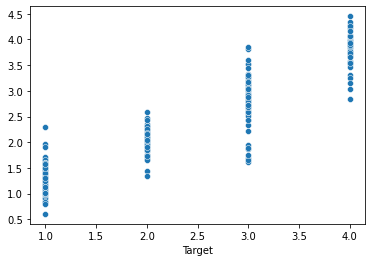

In [ ]:
sns.scatterplot(Y_test, Y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


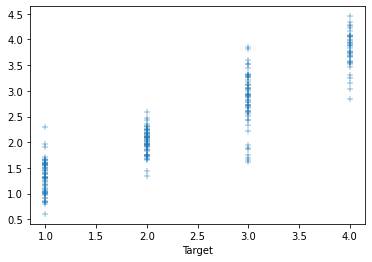

In [ ]:
sns.scatterplot(Y_test, Y_pred, marker="+")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


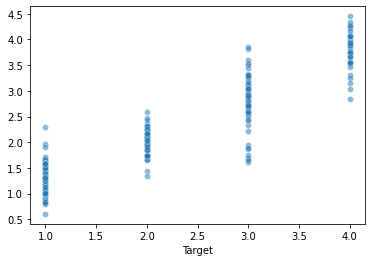

In [ ]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)

### Decision Tree

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.score(X_test, Y_test)

0.995475113122172

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_pred, Y_test)
cm

ValueError: ignored

Text(69.0, 0.5, 'Truth')

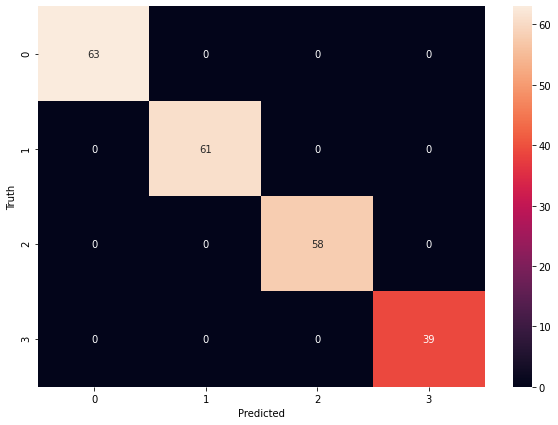

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(X_test, Y_test)

0.9638009049773756

In [ ]:
import seaborn as sn

In [ ]:
Y_predicts = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


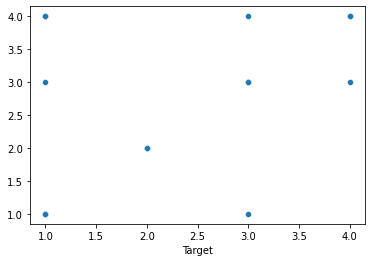

In [ ]:
sns.scatterplot(Y_test, Y_predicts)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predicts)
cm

array([[58,  0,  1,  4],
       [ 0, 61,  0,  0],
       [ 1,  0, 56,  1],
       [ 0,  0,  1, 38]])

Text(69.0, 0.5, 'Truth')

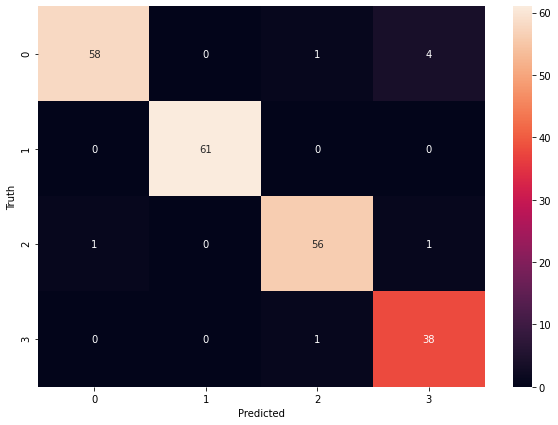

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Support Vector Machine (SVM)




In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model.score(X_test, Y_test)

0.751131221719457

In [ ]:
model.predict

<bound method BaseSVC.predict of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

In [ ]:
Y_predict = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


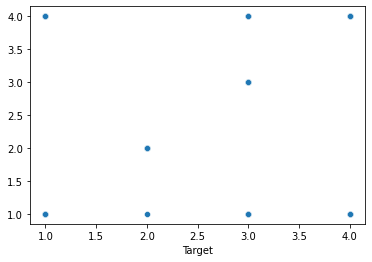

In [ ]:
sns.scatterplot(Y_test, Y_predict)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)
cm

array([[23,  0,  0, 40],
       [ 1, 60,  0,  0],
       [ 5,  0, 49,  4],
       [ 5,  0,  0, 34]])

Text(69.0, 0.5, 'Truth')

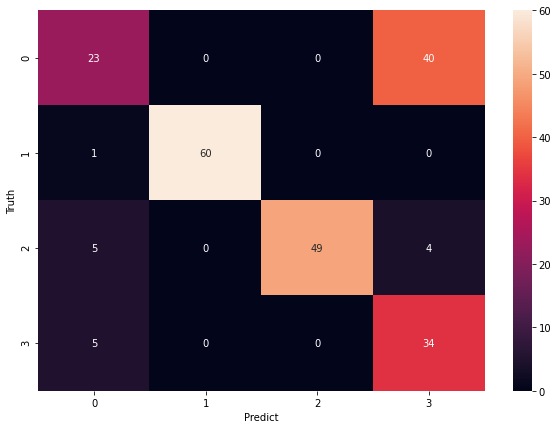

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

# Tune parameter

Regularization

In [ ]:
model_C = SVC(C=1)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

0.751131221719457

In [ ]:
model_C = SVC(C=10)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

0.8642533936651584

Gamma

In [ ]:
model_g = SVC(gamma=10)
model_g.fit(X_train, Y_train)
model_g.score(X_test, Y_test)

0.26244343891402716

Kernel

In [ ]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_linear_kernal.score(X_test, Y_test)

0.9909502262443439

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


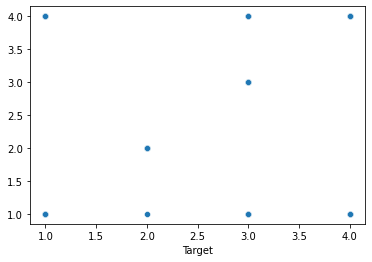

In [ ]:
sns.scatterplot(Y_test, Y_predict)